# E-Commerce Analytics Dashboard - Data Generation

This notebook generates synthetic datasets for our e-commerce analytics dashboard. We'll create five different datasets representing different aspects of an e-commerce business:

1. Sales Data (monthly performance)
2. Customer Demographics (age groups and spending)
3. Product Category Performance (sales by category)
4. Website Traffic Sources (traffic origin breakdown)
5. Marketing Campaign ROI (campaign performance metrics)

Each dataset will be saved as a CSV file to be used in our dashboard.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Create directory for data if it doesn't exist
import os
if not os.path.exists('data'):
    os.makedirs('data')

## 1. Monthly Sales Data (12 months)

This dataset will track monthly sales for the past 12 months, including revenue, order count, and average order value.

In [2]:
# Generate monthly sales data for the past 12 months
def generate_monthly_sales():
    # Get current date and go back 12 months
    end_date = datetime(2025, 4, 1)  # April 2025
    months = []

    # Create month labels
    for i in range(12):
        date = end_date - timedelta(days=30*i)
        months.insert(0, date.strftime('%b %Y'))

    # Generate sales with seasonal pattern (higher in Nov-Dec for holidays)
    base_sales = 120000
    sales = []
    for month in months:
        if 'Nov' in month or 'Dec' in month:
            # Holiday season boost
            sales_value = base_sales * (1.4 + 0.1 * np.random.randn())
        elif 'Jan' in month:
            # Post-holiday dip
            sales_value = base_sales * (0.7 + 0.1 * np.random.randn())
        else:
            # Regular months with slight growth trend
            position = months.index(month)
            trend_factor = 1.0 + (position * 0.02)  # 2% growth per month
            sales_value = base_sales * trend_factor * (0.9 + 0.2 * np.random.randn())

        sales.append(round(sales_value, 2))

    # Generate order counts (roughly correlates with sales)
    avg_order_value = 85  # Average order is $85
    order_counts = [round(s / (avg_order_value * (0.9 + 0.2 * np.random.rand()))) for s in sales]

    # Calculate real average order values
    aov = [round(sales[i] / order_counts[i], 2) for i in range(len(sales))]

    # Create DataFrame
    df = pd.DataFrame({
        'Month': months,
        'Revenue': sales,
        'Orders': order_counts,
        'AOV': aov
    })

    return df

monthly_sales_df = generate_monthly_sales()
monthly_sales_df.head()

,Month,Revenue,Orders,AOV
0,May 2024,119921.14,1468,81.69
1,Jun 2024,106775.29,1250,85.42
2,Jul 2024,128486.31,1532,83.87
3,Aug 2024,153225.88,1881,81.46
4,Sep 2024,110570.74,1272,86.93


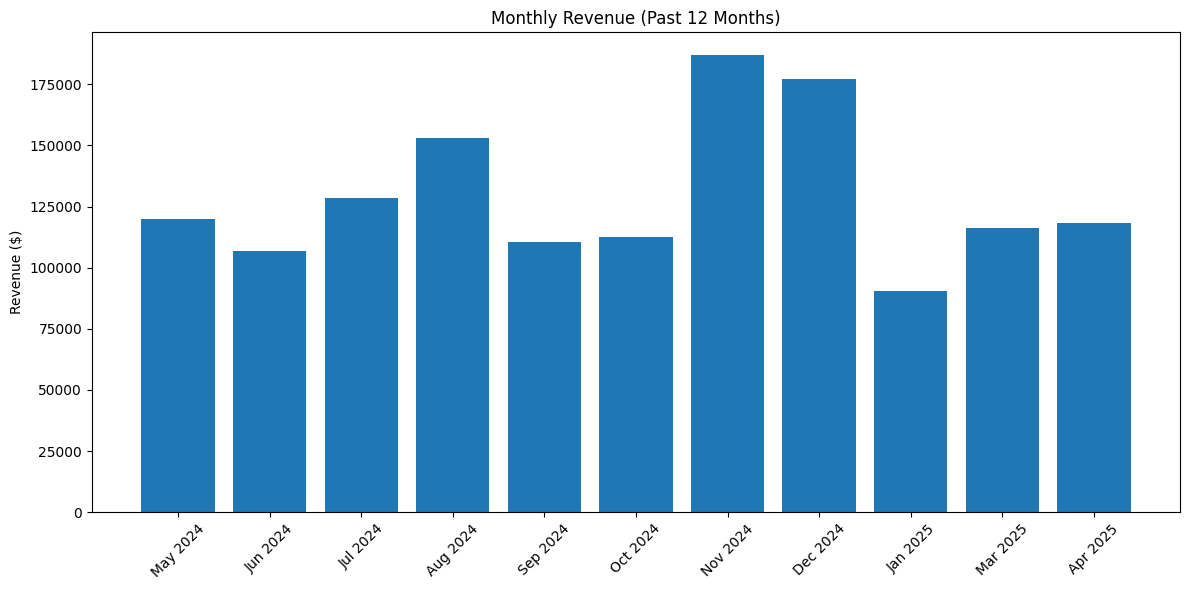

In [3]:
# Save to CSV
monthly_sales_df.to_csv('data/monthly_sales.csv', index=False)

# Quick visualization
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales_df['Month'], monthly_sales_df['Revenue'])
plt.title('Monthly Revenue (Past 12 Months)')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

## 2. Customer Demographics and Spending Data

This dataset will show spending patterns across different customer age groups and gender segments.

In [4]:
def generate_customer_demographics():
    # Define age groups
    age_groups = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

    # Distribution of customers across age groups (sum to 100%)
    distribution = [15, 28, 22, 18, 12, 5]  # percentages

    # Total customer count
    total_customers = 50000

    # Calculate customer count per age group
    customers = [round(total_customers * dist / 100) for dist in distribution]

    # Average spending patterns by age group (different for each gender)
    # Age group spending patterns - we'll create slightly different patterns for each gender
    male_spending_base = [750, 1200, 1500, 1450, 1100, 800]
    female_spending_base = [900, 1400, 1350, 1200, 950, 700]

    # Add some randomness
    male_spending = [round(s * (0.95 + 0.1 * np.random.rand()), 2) for s in male_spending_base]
    female_spending = [round(s * (0.95 + 0.1 * np.random.rand()), 2) for s in female_spending_base]

    # Gender distribution for each age group (percentage female)
    female_percentage = [55, 52, 51, 53, 54, 56]

    # Calculate counts and spending by gender and age group
    female_counts = [round(customers[i] * female_percentage[i] / 100) for i in range(len(age_groups))]
    male_counts = [customers[i] - female_counts[i] for i in range(len(age_groups))]

    # Create the dataframe
    data = []

    # Add male data
    for i in range(len(age_groups)):
        data.append({
            'AgeGroup': age_groups[i],
            'Gender': 'Male',
            'CustomerCount': male_counts[i],
            'AvgAnnualSpend': male_spending[i],
            'TotalSpend': round(male_counts[i] * male_spending[i])
        })

    # Add female data
    for i in range(len(age_groups)):
        data.append({
            'AgeGroup': age_groups[i],
            'Gender': 'Female',
            'CustomerCount': female_counts[i],
            'AvgAnnualSpend': female_spending[i],
            'TotalSpend': round(female_counts[i] * female_spending[i])
        })

    return pd.DataFrame(data)

customer_demographics_df = generate_customer_demographics()
customer_demographics_df.head()

,AgeGroup,Gender,CustomerCount,AvgAnnualSpend,TotalSpend
0,18-24,Male,3375,756.93,2554639
1,25-34,Male,6720,1145.57,7698230
2,35-44,Male,5390,1516.13,8171941
3,45-54,Male,4230,1402.23,5931433
4,55-64,Male,2760,1052.16,2903962


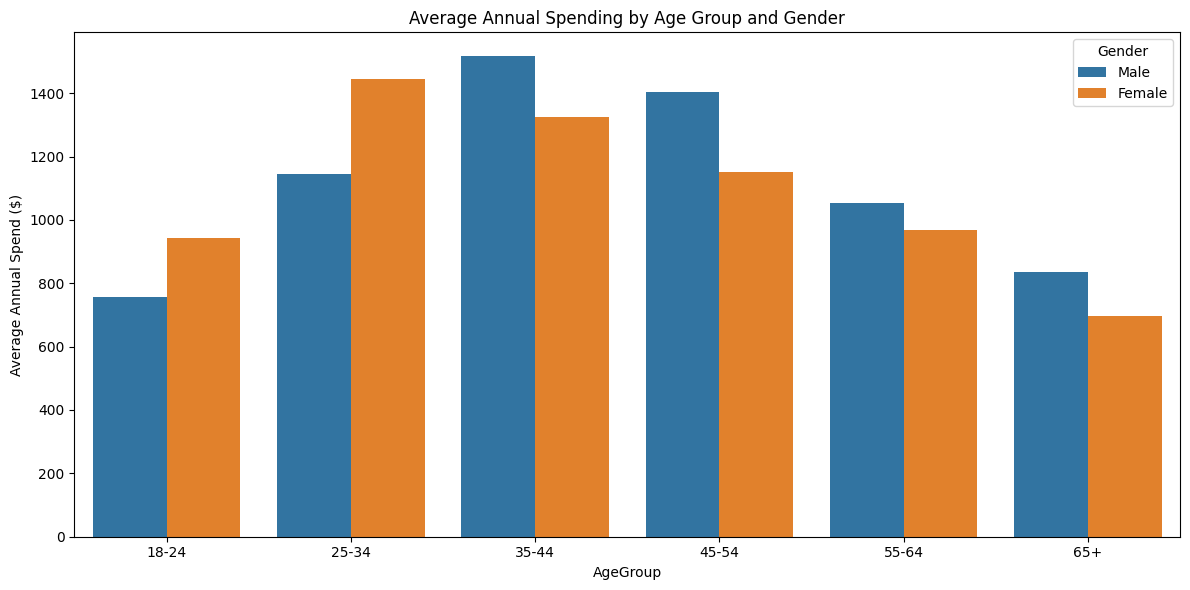

In [5]:
# Save to CSV
customer_demographics_df.to_csv('data/customer_demographics.csv', index=False)

# Quick visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='AvgAnnualSpend', hue='Gender', data=customer_demographics_df)
plt.title('Average Annual Spending by Age Group and Gender')
plt.ylabel('Average Annual Spend ($)')
plt.tight_layout()
plt.show()

## 3. Product Category Performance

This dataset will show sales performance metrics across different product categories.

In [6]:
def generate_product_category_data():
    # Define product categories
    categories = [
        'Electronics', 'Clothing', 'Home & Kitchen', 'Beauty & Personal Care',
        'Books', 'Sports & Outdoors', 'Toys & Games', 'Grocery'
    ]

    # Generate sales data with realistic variance
    sales = [
        round(2500000 * (0.9 + 0.2 * np.random.rand())),  # Electronics
        round(1800000 * (0.9 + 0.2 * np.random.rand())),  # Clothing
        round(1200000 * (0.9 + 0.2 * np.random.rand())),  # Home & Kitchen
        round(950000 * (0.9 + 0.2 * np.random.rand())),   # Beauty & Personal Care
        round(750000 * (0.9 + 0.2 * np.random.rand())),   # Books
        round(680000 * (0.9 + 0.2 * np.random.rand())),   # Sports & Outdoors
        round(580000 * (0.9 + 0.2 * np.random.rand())),   # Toys & Games
        round(480000 * (0.9 + 0.2 * np.random.rand()))    # Grocery
    ]

    # Profit margins vary by category
    margins = [
        round(0.25 * (0.9 + 0.2 * np.random.rand()), 2),  # Electronics
        round(0.45 * (0.9 + 0.2 * np.random.rand()), 2),  # Clothing
        round(0.35 * (0.9 + 0.2 * np.random.rand()), 2),  # Home & Kitchen
        round(0.55 * (0.9 + 0.2 * np.random.rand()), 2),  # Beauty & Personal Care
        round(0.40 * (0.9 + 0.2 * np.random.rand()), 2),  # Books
        round(0.32 * (0.9 + 0.2 * np.random.rand()), 2),  # Sports & Outdoors
        round(0.38 * (0.9 + 0.2 * np.random.rand()), 2),  # Toys & Games
        round(0.22 * (0.9 + 0.2 * np.random.rand()), 2)   # Grocery
    ]

    # Calculate profits
    profits = [round(sales[i] * margins[i]) for i in range(len(categories))]

    # Calculate units sold (different average prices per category)
    avg_prices = [120, 45, 65, 35, 25, 55, 30, 20]  # Average price per category
    units_sold = [round(sales[i] / avg_prices[i]) for i in range(len(categories))]

    # Year over year growth (some categories growing, some shrinking)
    yoy_growth = [
        round(0.08 * (0.5 + np.random.rand()), 2),   # Electronics - growing
        round(0.12 * (0.5 + np.random.rand()), 2),   # Clothing - growing fast
        round(0.05 * (0.5 + np.random.rand()), 2),   # Home & Kitchen - moderate growth
        round(0.15 * (0.5 + np.random.rand()), 2),   # Beauty & Personal Care - growing fast
        round(-0.03 * (0.5 + np.random.rand()), 2),  # Books - slight decline
        round(0.07 * (0.5 + np.random.rand()), 2),   # Sports & Outdoors - growing
        round(0.04 * (0.5 + np.random.rand()), 2),   # Toys & Games - moderate growth
        round(0.10 * (0.5 + np.random.rand()), 2)    # Grocery - growing
    ]

    # Create DataFrame
    df = pd.DataFrame({
        'Category': categories,
        'Revenue': sales,
        'Profit': profits,
        'Margin': margins,
        'UnitsSold': units_sold,
        'YoYGrowth': yoy_growth
    })

    return df

product_category_df = generate_product_category_data()
product_category_df.head()

,Category,Revenue,Profit,Margin,UnitsSold,YoYGrowth
0,Electronics,2311019,577755,0.25,19258,0.05
1,Clothing,1798264,755271,0.42,39961,0.08
2,Home & Kitchen,1088253,413536,0.38,16742,0.03
3,Beauty & Personal Care,1027771,596107,0.58,29365,0.12
4,Books,713817,314079,0.44,28553,-0.03


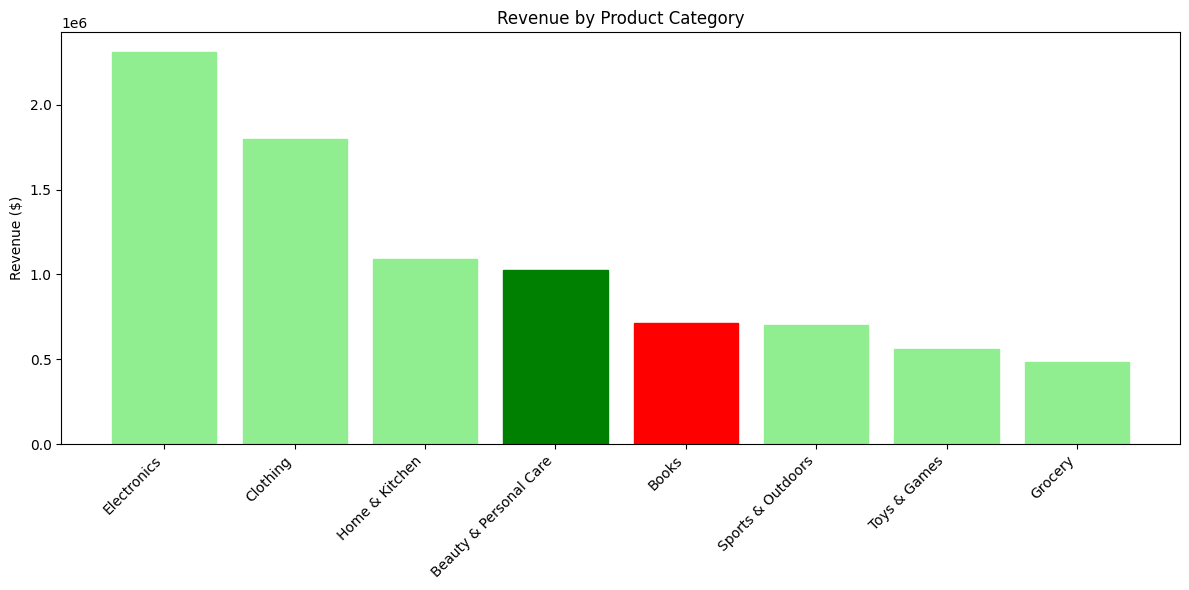

In [7]:
# Save to CSV
product_category_df.to_csv('data/product_categories.csv', index=False)

# Quick visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(product_category_df['Category'], product_category_df['Revenue'])

# Color bars based on YoY growth
for i, bar in enumerate(bars):
    growth = product_category_df['YoYGrowth'][i]
    if growth > 0.1:
        bar.set_color('green')  # Fast growth
    elif growth > 0:
        bar.set_color('lightgreen')  # Moderate growth
    else:
        bar.set_color('red')  # Decline

plt.title('Revenue by Product Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

## 4. Website Traffic Sources

This dataset will show website traffic metrics by source (organic search, paid search, social media, etc.)

In [8]:
def generate_traffic_data():
    # Define traffic sources
    sources = [
        'Organic Search', 'Paid Search', 'Social Media', 'Email',
        'Direct', 'Referral', 'Display Ads', 'Affiliates'
    ]

    # Base traffic numbers (last 6 months total)
    visits = [
        round(2500000 * (0.9 + 0.2 * np.random.rand())),  # Organic Search
        round(1750000 * (0.9 + 0.2 * np.random.rand())),  # Paid Search
        round(1200000 * (0.9 + 0.2 * np.random.rand())),  # Social Media
        round(850000 * (0.9 + 0.2 * np.random.rand())),   # Email
        round(750000 * (0.9 + 0.2 * np.random.rand())),   # Direct
        round(480000 * (0.9 + 0.2 * np.random.rand())),   # Referral
        round(350000 * (0.9 + 0.2 * np.random.rand())),   # Display Ads
        round(220000 * (0.9 + 0.2 * np.random.rand()))    # Affiliates
    ]

    # Conversion rates vary by traffic source
    conversion_rates = [
        round(0.028 * (0.9 + 0.2 * np.random.rand()), 4),  # Organic Search
        round(0.035 * (0.9 + 0.2 * np.random.rand()), 4),  # Paid Search
        round(0.022 * (0.9 + 0.2 * np.random.rand()), 4),  # Social Media
        round(0.045 * (0.9 + 0.2 * np.random.rand()), 4),  # Email
        round(0.033 * (0.9 + 0.2 * np.random.rand()), 4),  # Direct
        round(0.026 * (0.9 + 0.2 * np.random.rand()), 4),  # Referral
        round(0.018 * (0.9 + 0.2 * np.random.rand()), 4),  # Display Ads
        round(0.038 * (0.9 + 0.2 * np.random.rand()), 4)   # Affiliates
    ]

    # Calculate conversions
    conversions = [round(visits[i] * conversion_rates[i]) for i in range(len(sources))]

    # Average order value also varies by traffic source
    aov = [
        round(85 * (0.9 + 0.2 * np.random.rand()), 2),  # Organic Search
        round(92 * (0.9 + 0.2 * np.random.rand()), 2),  # Paid Search
        round(78 * (0.9 + 0.2 * np.random.rand()), 2),  # Social Media
        round(105 * (0.9 + 0.2 * np.random.rand()), 2), # Email
        round(95 * (0.9 + 0.2 * np.random.rand()), 2),  # Direct
        round(88 * (0.9 + 0.2 * np.random.rand()), 2),  # Referral
        round(72 * (0.9 + 0.2 * np.random.rand()), 2),  # Display Ads
        round(98 * (0.9 + 0.2 * np.random.rand()), 2)   # Affiliates
    ]

    # Calculate revenue
    revenue = [round(conversions[i] * aov[i]) for i in range(len(sources))]

    # Calculate bounce rates
    bounce_rates = [
        round(0.35 * (0.9 + 0.2 * np.random.rand()), 2),  # Organic Search
        round(0.42 * (0.9 + 0.2 * np.random.rand()), 2),  # Paid Search
        round(0.55 * (0.9 + 0.2 * np.random.rand()), 2),  # Social Media
        round(0.28 * (0.9 + 0.2 * np.random.rand()), 2),  # Email
        round(0.32 * (0.9 + 0.2 * np.random.rand()), 2),  # Direct
        round(0.40 * (0.9 + 0.2 * np.random.rand()), 2),  # Referral
        round(0.60 * (0.9 + 0.2 * np.random.rand()), 2),  # Display Ads
        round(0.38 * (0.9 + 0.2 * np.random.rand()), 2)   # Affiliates
    ]

    # Create DataFrame
    df = pd.DataFrame({
        'Source': sources,
        'Visits': visits,
        'ConversionRate': conversion_rates,
        'Conversions': conversions,
        'AOV': aov,
        'Revenue': revenue,
        'BounceRate': bounce_rates
    })

    return df

traffic_df = generate_traffic_data()
traffic_df.head()

,Source,Visits,ConversionRate,Conversions,AOV,Revenue,BounceRate
0,Organic Search,2390467,0.0252,60240,91.17,5492081,0.38
1,Paid Search,1764944,0.0372,65656,94.27,6189391,0.42
2,Social Media,1113822,0.0229,25507,75.36,1922208,0.51
3,Email,901373,0.0471,42455,95.83,4068463,0.29
4,Direct,686183,0.0348,23879,91.41,2182779,0.34


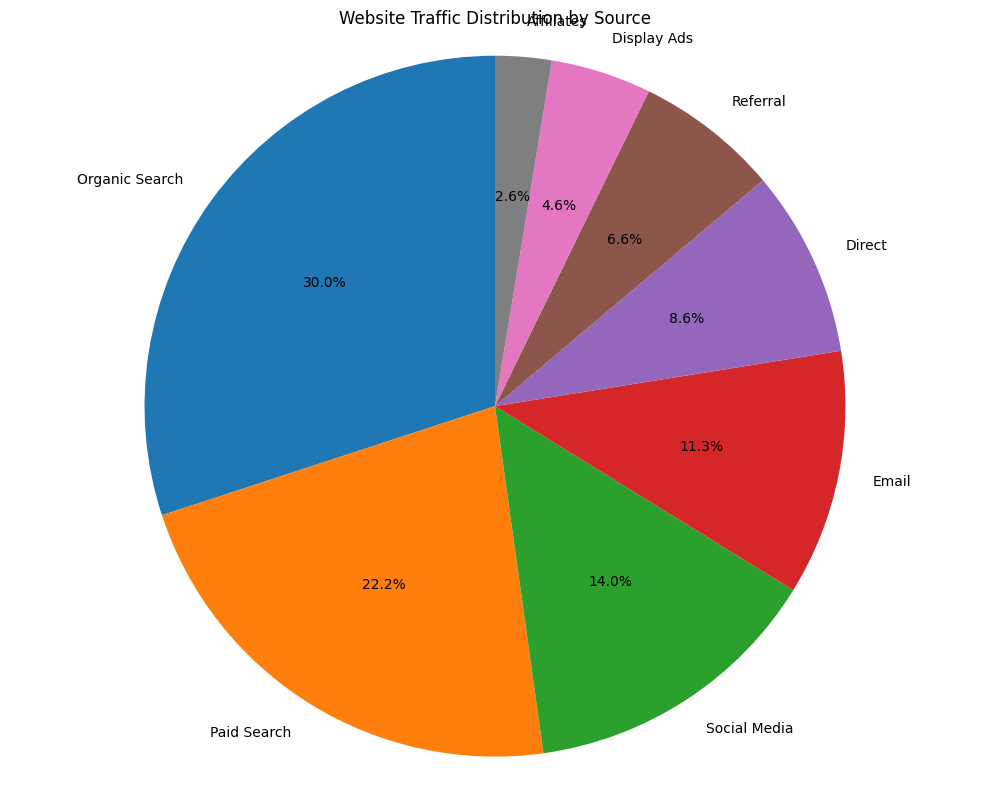

In [9]:
# Save to CSV
traffic_df.to_csv('data/traffic_sources.csv', index=False)

# Quick visualization - using a pie chart to show proportions
plt.figure(figsize=(10, 8))
plt.pie(traffic_df['Visits'], labels=traffic_df['Source'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.title('Website Traffic Distribution by Source')
plt.tight_layout()
plt.show()

## 5. Marketing Campaign Performance

This dataset will include ROI and performance metrics for different marketing campaigns.

In [10]:
def generate_campaign_data():
    # Define campaigns
    campaigns = [
        'Spring Sale 2025', 'Summer Collection Launch', 'Back to School',
        'Holiday Season Promotion', 'New Year Clearance', 'Valentine\'s Special',
        'Mobile App Promotion', 'Loyalty Program', 'Email Re-engagement',
        'TV Advertisement', 'Influencer Partnership'
    ]

    # Define campaign types/channels
    campaign_types = [
        'Seasonal Sale', 'Product Launch', 'Seasonal Sale',
        'Seasonal Sale', 'Clearance', 'Seasonal Sale',
        'App Promotion', 'Loyalty', 'Email Marketing',
        'Traditional Media', 'Social Media'
    ]

    # Campaign spending
    spend = [
        round(85000 * (0.9 + 0.2 * np.random.rand())),   # Spring Sale
        round(65000 * (0.9 + 0.2 * np.random.rand())),   # Summer Collection
        round(75000 * (0.9 + 0.2 * np.random.rand())),   # Back to School
        round(120000 * (0.9 + 0.2 * np.random.rand())),  # Holiday Season
        round(55000 * (0.9 + 0.2 * np.random.rand())),   # New Year Clearance
        round(35000 * (0.9 + 0.2 * np.random.rand())),   # Valentine's
        round(50000 * (0.9 + 0.2 * np.random.rand())),   # Mobile App
        round(45000 * (0.9 + 0.2 * np.random.rand())),   # Loyalty Program
        round(25000 * (0.9 + 0.2 * np.random.rand())),   # Email Re-engagement
        round(150000 * (0.9 + 0.2 * np.random.rand())),  # TV Advertisement
        round(70000 * (0.9 + 0.2 * np.random.rand()))    # Influencer Partnership
    ]

    # Campaign revenue (with realistic ROI variance)
    # Different campaign types have different typical ROIs
    roi_multiplier = [
        3.2,    # Spring Sale
        2.8,    # Summer Collection
        3.5,    # Back to School
        4.2,    # Holiday Season
        2.4,    # New Year Clearance
        3.0,    # Valentine's
        2.2,    # Mobile App
        3.8,    # Loyalty Program
        4.5,    # Email Re-engagement
        1.8,    # TV Advertisement
        2.5     # Influencer Partnership
    ]

    # Add randomness to ROIs
    revenue = [round(spend[i] * roi_multiplier[i] * (0.8 + 0.4 * np.random.rand())) for i in range(len(campaigns))]

    # Calculate ROI
    roi = [round((revenue[i] - spend[i]) / spend[i] * 100, 1) for i in range(len(campaigns))]

    # New customers acquired
    new_customers = [round(revenue[i] / (85 * (0.8 + 0.4 * np.random.rand())) * 0.35) for i in range(len(campaigns))]

    # Customer acquisition cost
    cac = [round(spend[i] / new_customers[i], 2) for i in range(len(campaigns))]

    # Create DataFrame
    df = pd.DataFrame({
        'Campaign': campaigns,
        'Type': campaign_types,
        'Spend': spend,
        'Revenue': revenue,
        'ROI_Percent': roi,
        'NewCustomers': new_customers,
        'CAC': cac  # Customer Acquisition Cost
    })

    # Sort by ROI (highest first)
    df = df.sort_values('ROI_Percent', ascending=False).reset_index(drop=True)

    return df

campaign_df = generate_campaign_data()
campaign_df.head()

,Campaign,Type,Spend,Revenue,ROI_Percent,NewCustomers,CAC
0,Email Re-engagement,Email Marketing,27038,139749,416.9,510,53.02
1,Loyalty Program,Loyalty,45077,180433,300.3,765,58.92
2,Holiday Season Promotion,Seasonal Sale,110589,425412,284.7,1512,73.14
3,Spring Sale 2025,Seasonal Sale,85386,301165,252.7,1072,79.65
4,Valentine's Special,Seasonal Sale,35955,126405,251.6,617,58.27


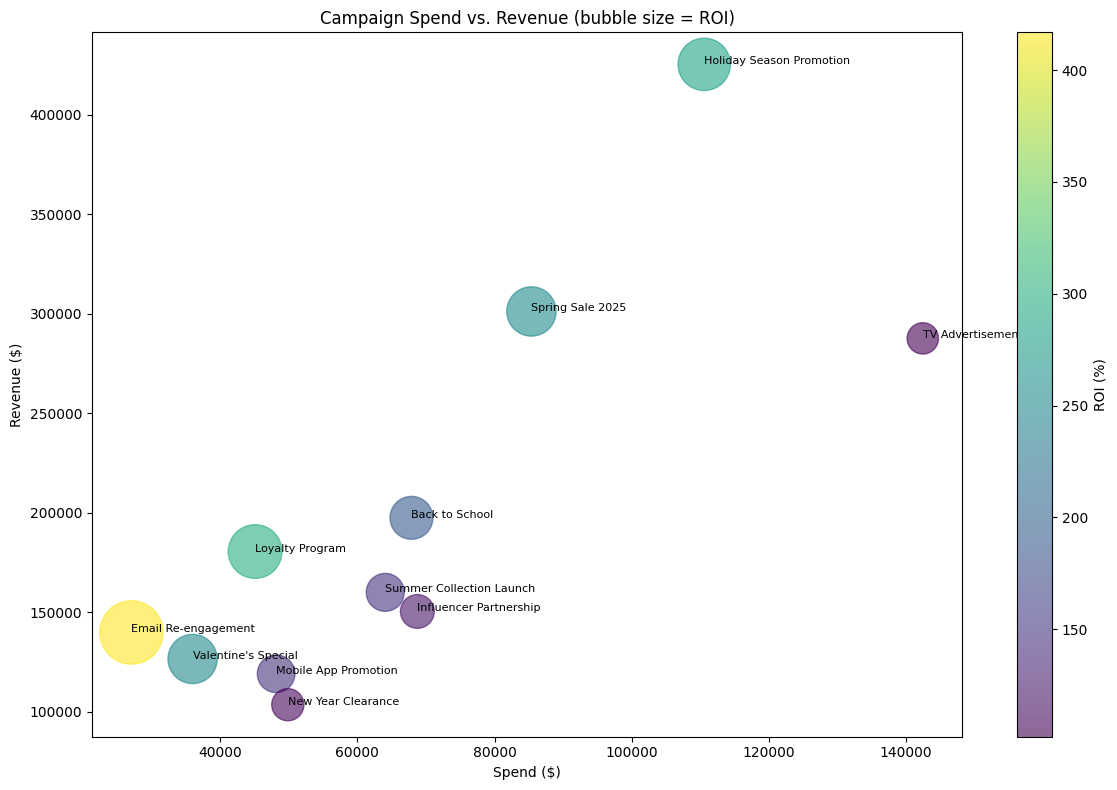

In [11]:
# Save to CSV
campaign_df.to_csv('data/marketing_campaigns.csv', index=False)

# Quick visualization - scatter plot of spend vs revenue with size indicating ROI
plt.figure(figsize=(12, 8))
scatter = plt.scatter(campaign_df['Spend'], campaign_df['Revenue'],
                      s=campaign_df['ROI_Percent']*5, # Size based on ROI
                      alpha=0.6, c=campaign_df['ROI_Percent'], cmap='viridis')
plt.colorbar(scatter, label='ROI (%)')

# Add campaign labels to points
for i, campaign in enumerate(campaign_df['Campaign']):
    plt.annotate(campaign,
                 (campaign_df['Spend'][i], campaign_df['Revenue'][i]),
                 fontsize=8)

plt.title('Campaign Spend vs. Revenue (bubble size = ROI)')
plt.xlabel('Spend ($)')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

## Future Enhancements

Potential improvements for future versions of this dashboard:

1. Add filtering controls to allow users to interactively explore the data
2. Implement cross-filtering between charts (where selecting data in one chart filters others)
3. Add dashboard tabs to include more visualizations while maintaining clean layout
4. Incorporate real-time data updates or API connections
5. Add more advanced visualizations like geographic maps or network diagrams
6. Implement user authentication and personalization features
7. Add data export functionality for further analysis